# Retail Data Exercise

## Goal:
Compare revenue  of Wholesale (B2B) vs. Non-Wholesale (B2C) Orders

## Tasks:
- Perform an Exploratory Data Analysis
- Fix Errors in data
- Calculate revenue
- Find a criteria to flag wholesale orders
- Compare B2B to B2C orders

## Setup

In [ ]:
pip install pandas openpyxl matplotlib

In [ ]:
import pandas as pd

## Exploratory Data Analysis

In [ ]:
df = pd.read_excel("retail_data_s.xlsx", sheet_name = "Data")

In [ ]:
df

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice
0,13047,536367,2010-12-01 08:34:00,84879,32,1.69
1,13047,536367,2010-12-01 08:34:00,22745,6,2.10
2,13047,536367,2010-12-01 08:34:00,22748,6,2.10
3,13047,536367,2010-12-01 08:34:00,22749,8,3.75
4,13047,536367,2010-12-01 08:34:00,22310,6,1.65
...,...,...,...,...,...,...
91460,17581,581581,2011-12-09 12:20:00,23562,6,2.89
91461,17581,581581,2011-12-09 12:20:00,23561,6,2.89
91462,17581,581581,2011-12-09 12:20:00,23681,10,1.65
91463,17581,581582,2011-12-09 12:21:00,23552,6,2.08


Note: 

* A Customer ID can have multiple InvoiceNo and an InvoiceNo can have multiple rows (orders)
* ID column is already there

In [ ]:
df.describe()

,CustomerID,InvoiceNo,Quantity,UnitPrice
count,91465.000000,91465.000000,91465.000000,91465.000000
mean,15101.770426,560116.483114,12.352386,2.943347
std,1756.168325,13205.742026,40.065201,8.776144
min,12347.000000,536367.000000,1.000000,0.000000
25%,13488.000000,548739.000000,2.000000,1.250000
50%,14944.000000,560841.000000,6.000000,1.690000
75%,16628.000000,571676.000000,12.000000,3.750000
max,18287.000000,581582.000000,2880.000000,1241.980000


In [ ]:
df.sort_values("Quantity", ascending = False).head(20)

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice
973,16754,536830,2010-12-02 17:38:00,84077,2880,0.18
58793,17450,567423,2011-09-20 11:05:00,23285,1944,1.08
58792,17450,567423,2011-09-20 11:05:00,23288,1944,1.08
58791,17450,567423,2011-09-20 11:05:00,23286,1878,1.08
82854,17857,578060,2011-11-22 15:22:00,M,1600,0.25
13870,13848,543991,2011-02-15 10:17:00,16014,1500,0.32
47220,15118,561638,2011-07-28 14:54:00,84568,1440,0.17
1087,14156,536890,2010-12-03 11:48:00,17084R,1440,0.16
58797,17450,567423,2011-09-20 11:05:00,22969,1428,1.70
58800,17450,567423,2011-09-20 11:05:00,23243,1412,5.06


## Clean Data

Inspect orders with "M" Stock code

In [ ]:
df.query("StockCode != 'M'")

Remove orders with "M" Stock code

In [ ]:
df_clean = df.query("StockCode != 'M'")

Remove free products

In [ ]:
df_clean = df_clean.query("UnitPrice > 0")

Descriptive statistics

In [ ]:
df_clean.describe()

,CustomerID,InvoiceNo,Quantity,UnitPrice
count,91383.000000,91383.000000,91383.000000,91383.000000
mean,15102.159526,560119.154077,12.308055,2.875542
std,1755.922140,13203.645238,39.358124,4.637190
min,12347.000000,536367.000000,1.000000,0.040000
25%,13488.000000,548739.000000,2.000000,1.250000
50%,14944.000000,560841.000000,6.000000,1.690000
75%,16628.000000,571676.000000,12.000000,3.750000
max,18287.000000,581582.000000,2880.000000,300.000000


### Calculate Revenue

In [ ]:
df_clean['Revenue'] = df_clean['Quantity'] * df_clean['UnitPrice']

In [ ]:
df_clean

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Revenue
0,13047,536367,2010-12-01 08:34:00,84879,32,1.69,54.08
1,13047,536367,2010-12-01 08:34:00,22745,6,2.10,12.60
2,13047,536367,2010-12-01 08:34:00,22748,6,2.10,12.60
3,13047,536367,2010-12-01 08:34:00,22749,8,3.75,30.00
4,13047,536367,2010-12-01 08:34:00,22310,6,1.65,9.90
...,...,...,...,...,...,...,...
91460,17581,581581,2011-12-09 12:20:00,23562,6,2.89,17.34
91461,17581,581581,2011-12-09 12:20:00,23561,6,2.89,17.34
91462,17581,581581,2011-12-09 12:20:00,23681,10,1.65,16.50
91463,17581,581582,2011-12-09 12:21:00,23552,6,2.08,12.48


### Find a criteria to flag wholesale orders

Approach: Flag every order with more than 3 * STD of Quantity as Wholesale order

In [ ]:
def flag_wholesale(quantity):
  quantity_avg = 12.3
  quantity_std = 39.36

  if quantity >= (quantity_avg + 3 * quantity_std):
    return "B2B"
  else:
    return "B2C"

In [ ]:
flag_wholesale(300)

In [ ]:
df_clean['Quantity'].map(flag_wholesale)

0        B2C
1        B2C
2        B2C
3        B2C
4        B2C
        ... 
91460    B2C
91461    B2C
91462    B2C
91463    B2C
91464    B2C
Name: Quantity, Length: 91383, dtype: object

In [ ]:
df_clean['Segment'] = df_clean['Quantity'].map(flag_wholesale)

In [ ]:
df_clean

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Quantity,UnitPrice,Revenue,Segment
0,13047,536367,2010-12-01 08:34:00,84879,32,1.69,54.08,B2C
1,13047,536367,2010-12-01 08:34:00,22745,6,2.10,12.60,B2C
2,13047,536367,2010-12-01 08:34:00,22748,6,2.10,12.60,B2C
3,13047,536367,2010-12-01 08:34:00,22749,8,3.75,30.00,B2C
4,13047,536367,2010-12-01 08:34:00,22310,6,1.65,9.90,B2C
...,...,...,...,...,...,...,...,...
91460,17581,581581,2011-12-09 12:20:00,23562,6,2.89,17.34,B2C
91461,17581,581581,2011-12-09 12:20:00,23561,6,2.89,17.34,B2C
91462,17581,581581,2011-12-09 12:20:00,23681,10,1.65,16.50,B2C
91463,17581,581582,2011-12-09 12:21:00,23552,6,2.08,12.48,B2C


### Compare B2B to B2C orders

In [ ]:
pd.pivot_table(df_clean, index = ['Segment'], values = ['Revenue'], aggfunc = ['sum']  )

,sum
,Revenue
Segment,
B2B,352482.43
B2C,1564510.24


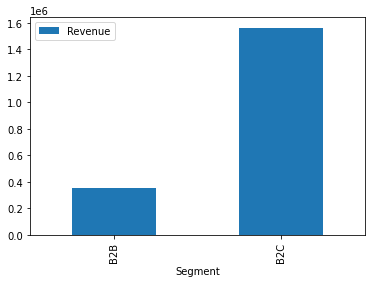

In [ ]:
(pd
.pivot_table(df_clean, index = ['Segment'], values = ['Revenue'], aggfunc = 'sum' )
.plot
.bar());

**Clear all outputs!**

**Run again!**